<a href="https://colab.research.google.com/github/mnhtm187/Minh-T-m-31241027094/blob/main/FACES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 42 images belonging to 4 classes.
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2475 - loss: 1.4126 - val_accuracy: 0.2500 - val_loss: 1.3589
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.2212 - loss: 1.4193 - val_accuracy: 0.2500 - val_loss: 1.3441
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.4053 - loss: 1.3285 - val_accuracy: 0.6250 - val_loss: 1.3127
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.4190 - loss: 1.3111 - val_accuracy: 0.6250 - val_loss: 1.2156
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.5143 - loss: 1.2477 - val_accuracy: 0.6250 - val_loss: 1.1280
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6528 - loss: 1.0897 - val_accuracy: 0.5000 - val_loss: 0.9488
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.5317 - loss: 1.0480 - val_accuracy: 0.7500 - val_loss: 0.9517
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.5580 - loss: 1.07

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,915,470 (37.82 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,314 (25.22 MB)

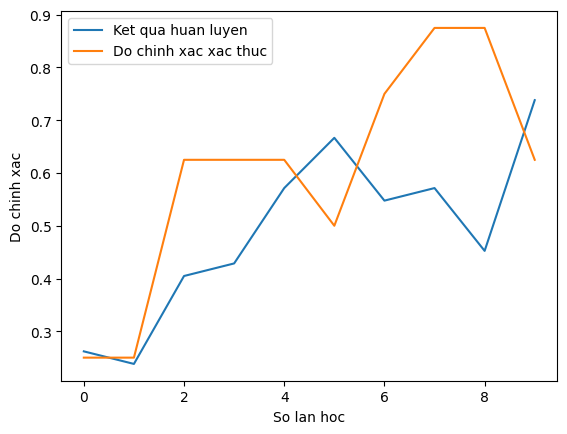

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


train_dir = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces'
validation_dir = train_dir
img_width, img_height = 128,128
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = "categorical"
)
model = Sequential([
    Conv2D(32,(3,3), activation ="relu", input_shape =(img_width, img_height,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation ="relu"),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation ="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(4,activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
model.summary()


plt.plot(history.history['accuracy'], label = "Ket qua huan luyen")
plt.plot(history.history['val_accuracy'],label="Do chinh xac xac thuc")
plt.xlabel("So lan hoc")
plt.ylabel("Do chinh xac")
plt.legend()
plt.show()





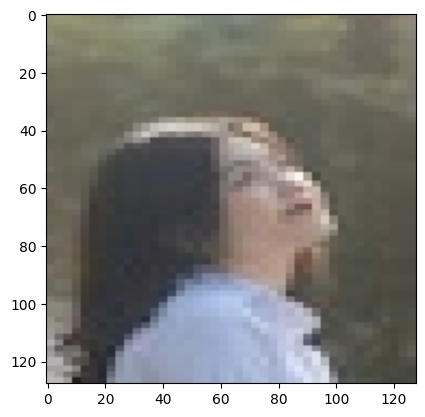

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Người tiên đoán: Uyên Vy


In [27]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Uyên Vy/vy 5.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()

# Convert the image to a NumPy array first
img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]
print(f"Người tiên đoán: {predicted_class}")

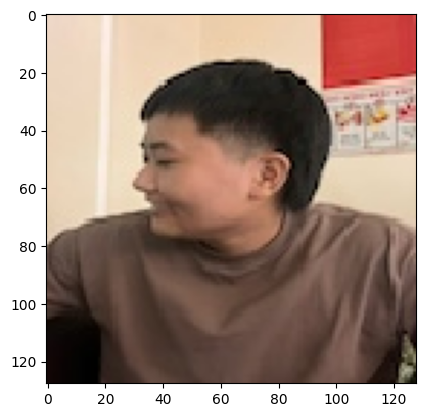

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Người tiên đoán: Bội Hoàn


In [20]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Bội Hoàn/Hoàn 10.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

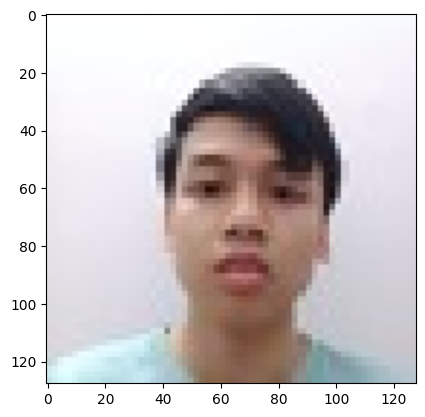

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Người tiên đoán: Trung Hiếu


In [25]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Trung Hiếu/812cf385-f0df-4619-8965-4c93fbf17f6a.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()

img_array = np.array(img)
img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

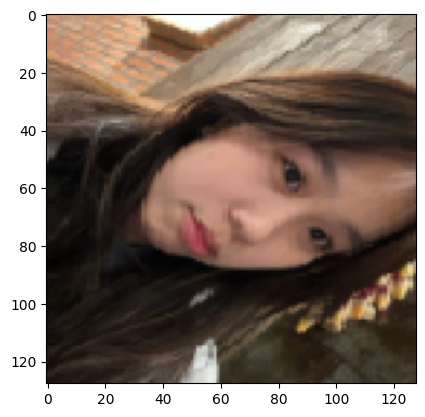

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Người tiên đoán: Minh Tâm


In [23]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path='/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Minh Tâm/z6390896448909_83e08fae9a0e1437502807c36cf8e610.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)
img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

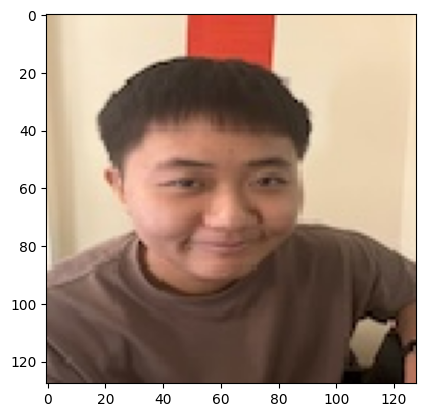

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Người tiên đoán: Bội Hoàn


In [24]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Bội Hoàn/Hoàn 5.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

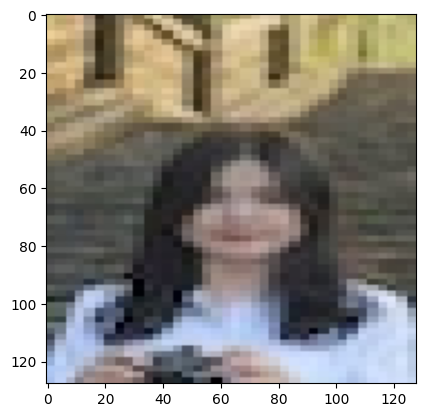

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Người tiên đoán: Uyên Vy


In [28]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Uyên Vy/vy 10.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

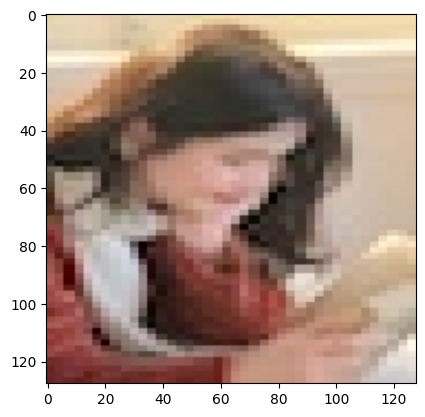

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Người tiên đoán: Uyên Vy


In [29]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Uyên Vy/vy 8.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

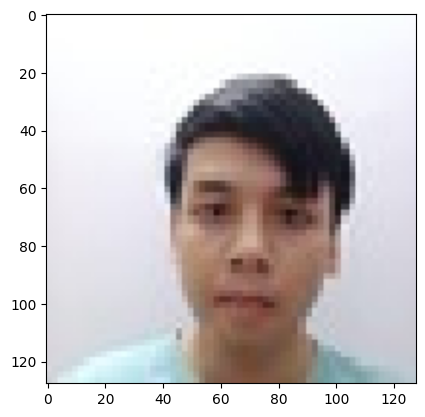

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Người tiên đoán: Trung Hiếu


In [30]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Trung Hiếu/ade86523-5c00-45d6-8a25-5f013e182f59 (1).jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

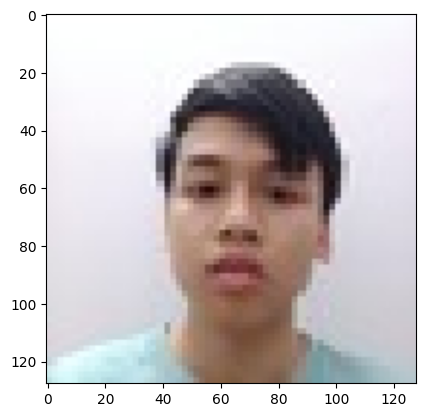

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Người tiên đoán: Trung Hiếu


In [31]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Trung Hiếu/e103d515-473c-4a7e-b5c5-cc1e3cf7d8ce.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")

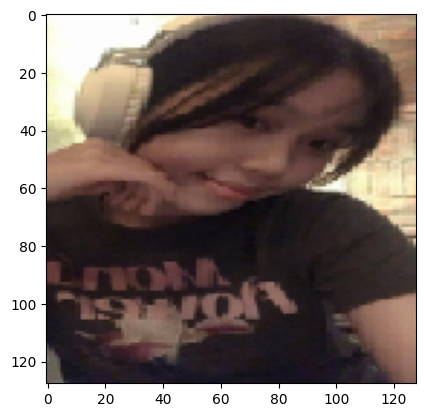

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Người tiên đoán: Minh Tâm


In [34]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/12/Faces-20250317T080553Z-001/Faces/Minh Tâm/z6390896461671_2428043d9963cbfa08a47cdbc154d2f2.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Người tiên đoán: {predicted_class}")